<a href="https://colab.research.google.com/github/asmaa199/FraudDetection/blob/main/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This project demonstrates the use of a machine learning algorithm to detect online fraud in real-time, ensuring secure online transactions.**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score


**LOAD DATA SET**

In [ ]:
#Load data from google drive
from google.colab import drive

drive.mount('/content/drive')
!ls /content/drive/MyDrive/fraudDetection/creditcard.csv

data = pd.read_csv("/content/drive/MyDrive/fraudDetection/creditcard.csv")

data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/fraudDetection/creditcard.csv


TypeError: 'tuple' object is not callable

**Data Preprocessing**

In [ ]:
# Feature scaling
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))
data['Time'] = scaler.fit_transform(data['Time'].values.reshape(-1, 1))

# Split data
X = data.drop(['Class'], axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Address imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

**Model Training**

In [ ]:

# Train Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_smote, y_train_smote)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f"ROC-AUC: {roc_auc}")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.84      0.84        98

    accuracy                           1.00     56962
   macro avg       0.92      0.92      0.92     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC: 0.973103297664029


**Data Visualization**

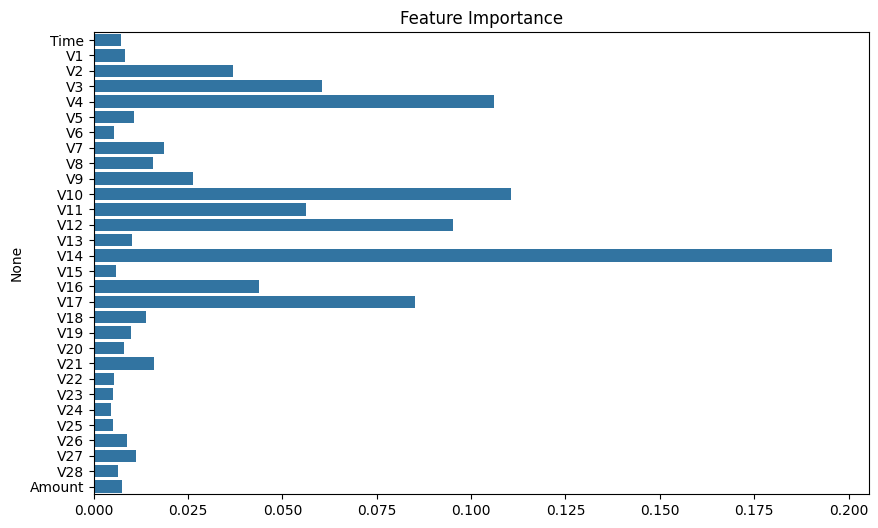

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize feature importance
feature_importance = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=features)
plt.title('Feature Importance')
plt.show()